<a href="https://colab.research.google.com/github/MelissaPR24/Advanced_ML_MelissaPR/blob/main/Assignment_1_mpaniagu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classifying movie reviews: Binary Classification Neural Network**

**Melissa Paniagua**

**MIS 64061: Advanced Machine Learning**

**Prof. Shanker**





The purpose of this assignment is to explore and extend knowlege of my first Neural Network model.

In this assignment, we will be using the "IMDB dataset", and the goal is to classify movies reviews as positive or negative. This dataset has a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.



###**Import the Keras library and IMDB dataset**

In [ ]:
import keras
keras.__version__

'2.4.3'

We will also import numpy in order to set a seed to be able to reproduce our models

In [ ]:
# for reproducibility 
import numpy as np
#np.random.seed(123) 

Load the IMDB dataset.

In [ ]:
from keras.datasets import imdb


In [ ]:

(train_data, train_labels), (test_data, test_labels) =imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Note that "**num_words=10000**" is added in the code. It means that only the top 10,000 most common words will be used to have a more manageable size vector data.

The **train_data** and **test_data** are lists of reviews, each review being a list of word indices (encoding a sequence of words).  The **train_labels** and **test_labels** are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive."

**Training data**

See the datapoints that have negative review:

In [ ]:
train_labels[0]

1

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
len(train_labels)

25000

In [ ]:
train_data


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,


**Test dataset**

Now, let's see the test set.

In [ ]:
test_labels[0]

0

In [ ]:
len(test_labels)

25000

In [ ]:
test_labels

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

**See reviews**

In this section, we will develop a code to see specific reviews.

In [ ]:
max([max(sequence) for sequence in train_data])

9999

We restricted our model to choose the top 10,000 most common works. So, no word index will exceed 10,000.

Now, let's decode one review to be able to read it in English words.

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[3]])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prot

**Prepare the data**

We have to change our reviews from characters into tensors. There are two ways we could do that:

* We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as first layer in our network a layer capable of handling such integer tensors.
* We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence  [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

We will do the second option manually. 

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

Now, let's vectorizes the labels

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The data is now ready for our neural network.

In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

## **Build the Neural Network 2 Hidden Layers**

By then, our input data is simply vectors, and our labels are scalars (1s and 0s). 

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Now, let's define the loss function, optimizer, and metrics.
 
*   A loss function: measure how good a job it is doing on its training data, and it will find the right direction.
*   An optimizer: network will update itself based on the data it sees and its loss function.
*   Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified)

In [ ]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

Here, we are passing our optimizer, loss function and metrics as strings, which is possible because rmsprop, binary_crossentropy and accuracy are packaged as part of Keras.

#### But another approach...

if we want to configure the parameters of your optimizer, or pass a custom loss function or metric function.

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

**Validate the Approach**

In order to validate how our training set is performing, we will create a validation set of 10,000 to measure the performance of the training set, which originally was 25,000.

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
len(x_train)

25000

In [ ]:
len(x_val)

10000

In [ ]:
len(partial_x_train)

15000

In [ ]:
len(partial_y_train)

15000

We will now train our model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the validation_data argument:

In [ ]:
np.random.seed(123) 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6012 - accuracy: 0.6943 - val_loss: 0.3994 - val_accuracy: 0.8551
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3305 - accuracy: 0.8948 - val_loss: 0.3070 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2166 - accuracy: 0.9359 - val_loss: 0.2777 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1754 - accuracy: 0.9433 - val_loss: 0.2798 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1394 - accuracy: 0.9588 - val_loss: 0.3005 - val_accuracy: 0.8806
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1171 - accuracy: 0.9655 - val_loss: 0.2971 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0951 - accuracy: 0.9723 - val_loss: 0.3353 - val_accuracy: 0.8782
Epoch 8/20
30


On CPU, this took less than two seconds per epoch, but the first epoch took almost 4 seconds -- training is over in 30 seconds.

The loss and accuracy on the training were 0.0029 and 99% respectively. Regarding the loss and accuracy on the validation set were 0.72 and 86.25%.

Now, let's see the History object, which is a dictionary containing data about everything that happened during training. 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's plot the training and validation loss side by side, as well as the training and validation accuracy:

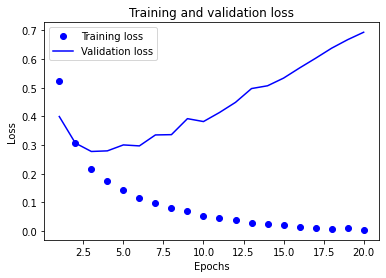

In [ ]:
import matplotlib.pyplot as plt

twoly_binary_accuracy = history.history['accuracy']
twoly_val_binary_accuracy = history.history['val_accuracy']
twoly_loss = history.history['loss']
twoly_val_loss = history.history['val_loss']

twoly_epochs = range(1, len(twoly_binary_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(twoly_epochs, twoly_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(twoly_epochs, twoly_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

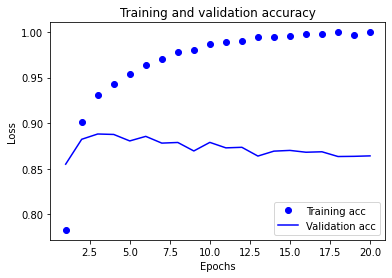

In [ ]:
plt.clf()   # clear figure
twoly_acc_values = history_dict['accuracy']
twoly_val_acc_values = history_dict['val_accuracy']

plt.plot(twoly_epochs, twoly_acc_values, 'bo', label='Training acc')
plt.plot(twoly_epochs, twoly_val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As we can see, the validation is increasing after the 4th epoch, which means we are overfitting the model: after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set. 

Now, let's build the model again from scrath, then evaluate it on the test set.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5341 - accuracy: 0.7660
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2683 - accuracy: 0.9114
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2030 - accuracy: 0.9309
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3284 - accuracy: 0.8698


In [ ]:
results

[0.32838839292526245, 0.8698400259017944]

The accuracy and loss of the test set utilizing two layers is 86.98% and 0.32 respectively.

The accuracy on the test set is:

In [ ]:
results[1]

0.8698400259017944

**Predictions on the Test Set**

After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method:

In [ ]:
model.predict(x_test)

array([[0.11339638],
       [0.99970526],
       [0.84362584],
       ...,
       [0.06493327],
       [0.041783  ],
       [0.49492556]], dtype=float32)

## **Build the Neural Network 1 Hidden Layers**

Let's build our NN with one layer, and everything will keep the same as the previous 2-Layer NN.

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
np.random.seed(123) 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5841 - accuracy: 0.6940 - val_loss: 0.3933 - val_accuracy: 0.8532
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3263 - accuracy: 0.9014 - val_loss: 0.3115 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2407 - accuracy: 0.9263 - val_loss: 0.2865 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1916 - accuracy: 0.9448 - val_loss: 0.2810 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1623 - accuracy: 0.9533 - val_loss: 0.2777 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1408 - accuracy: 0.9615 - val_loss: 0.2767 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1200 - accuracy: 0.9663 - val_loss: 0.2896 - val_accuracy: 0.8831
Epoch 8/20
30

The accucary in the validation set is 87.14% and we can see that after the third epoch the accuracy started to decreased. The validation loss is 0.4848

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

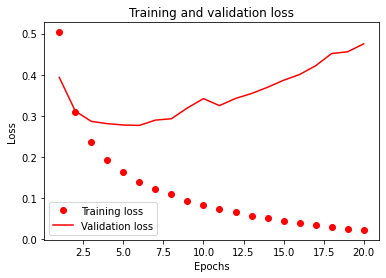

In [ ]:
import matplotlib.pyplot as plt

onely_accuracy = history.history['accuracy']
onely_val_accuracy = history.history['val_accuracy']
onely_loss = history.history['loss']
onely_val_loss = history.history['val_loss']

onely_epochs = range(1, len(onely_accuracy) + 1)


plt.plot(onely_epochs, onely_loss, 'ro', label='Training loss')
plt.plot(onely_epochs, onely_val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

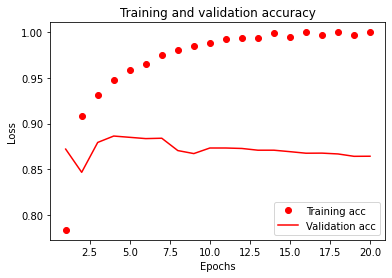

In [ ]:
plt.clf()   # clear figure
onely_acc_values = history_dict['accuracy']
onely_val_acc_values = history_dict['val_accuracy']

plt.plot(onely_epochs, onely_acc_values, 'ro', label='Training acc')
plt.plot(onely_epochs, onely_val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 11ms/step - loss: 0.5289 - accuracy: 0.7528
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2773 - accuracy: 0.9083
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2164 - accuracy: 0.9249
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1812 - accuracy: 0.9388
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2909 - accuracy: 0.8836


In [ ]:
results

[0.2909294664859772, 0.8835999965667725]

After changing the number of epochs, the accuracy on the test set is 87.97% and the test loss is 0.29

In [ ]:
model.predict(x_test)

array([[0.21043289],
       [0.9996165 ],
       [0.89232206],
       ...,
       [0.17247674],
       [0.09397757],
       [0.6682158 ]], dtype=float32)

## **Build the Neural Network 3 Hidden Layers**

Let's build our NN with three layer, and everything will keep the same as our first 2-Layer NN.

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
original = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.6068 - accuracy: 0.7016 - val_loss: 0.3835 - val_accuracy: 0.8720
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3169 - accuracy: 0.9038 - val_loss: 0.3679 - val_accuracy: 0.8466
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2166 - accuracy: 0.9294 - val_loss: 0.3015 - val_accuracy: 0.8793
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1630 - accuracy: 0.9481 - val_loss: 0.2836 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1202 - accuracy: 0.9640 - val_loss: 0.2951 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1019 - accuracy: 0.9681 - val_loss: 0.3151 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0751 - accuracy: 0.9788 - val_loss: 0.3444 - val_accuracy: 0.8839
Epoch 8/20
30

  we we can see that the validation accuracy is 86.79% and the validation loss is 0.74. The validation model started to decrease in the second epoch. 

In [ ]:
history_dict = original.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

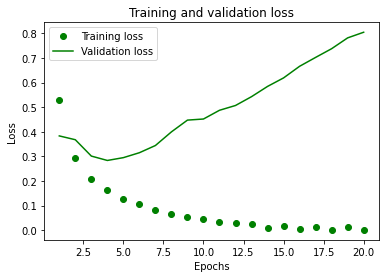

In [ ]:
threely_accuracy = original.history['accuracy']
threely_val_accuracy = original.history['val_accuracy']
threely_loss = original.history['loss']
threely_val_loss = original.history['val_loss']

threely_epochs = range(1, len(threely_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(threely_epochs, threely_loss, 'go', label='Training loss')
# b is for "solid blue line"
plt.plot(threely_epochs, threely_val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

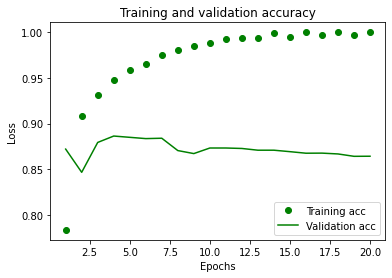

In [ ]:
plt.clf()   # clear figure
threely_acc_values = history_dict['accuracy']
threely_val_acc_values = history_dict['val_accuracy']

plt.plot(threely_epochs, threely_acc_values, 'go', label='Training acc')
plt.plot(threely_epochs, threely_val_acc_values, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/2
49/49 [==============================] - 1s 11ms/step - loss: 0.5900 - accuracy: 0.7237
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.2923 - accuracy: 0.8854


Now the accuracy of the three layers neural network is 88.84%

In [ ]:
results

[0.29229602217674255, 0.8853600025177002]

The test accuracy is 88.54%, with a loss of 0.29. Remember, the smaller the loss function, closer to the target!

In [ ]:
model.predict(x_test)

array([[0.35190508],
       [0.9931867 ],
       [0.9381051 ],
       ...,
       [0.12605684],
       [0.18515374],
       [0.5705311 ]], dtype=float32)

Since the Three Layers model has the best accuracy, we will continue the following section using this only model and find the way to improve its accuracy.

##**Neural Network more hidden units or fewer hidden units**

As mentioned before, we will use the Three layer model and see how its accuracy changes based on more hidden units. To accomplish it, we will use 32, 150, and 400 neurons respectively.

In [ ]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.5661 - accuracy: 0.6987 - val_loss: 0.3370 - val_accuracy: 0.8718
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2579 - accuracy: 0.9142 - val_loss: 0.2851 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1985 - accuracy: 0.9284 - val_loss: 0.2831 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1380 - accuracy: 0.9538 - val_loss: 0.2963 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1110 - accuracy: 0.9632 - val_loss: 0.3146 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0737 - accuracy: 0.9796 - val_loss: 0.3468 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0593 - accuracy: 0.9834 - val_loss: 0.3853 - val_accuracy: 0.8776
Epoch 8/20
30

The accuracy on the validation set utilizing 32 neurons is 86.95% with a loss of 0.93

The accuracy on the validation set utilizing 150 neurons is 88.15% and the loss is 1.74

The accuracy on the validation set utilizing 400 neurons is 88.87% and the loss is 1.40

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

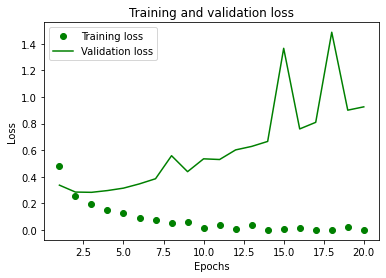

In [ ]:
import matplotlib.pyplot as plt

threely_accuracy = history.history['accuracy']
threely_val_accuracy = history.history['val_accuracy']
threely_loss = history.history['loss']
threely_val_loss = history.history['val_loss']

threely_epochs = range(1, len(threely_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(threely_epochs, threely_loss, 'go', label='Training loss')
# b is for "solid blue line"
plt.plot(threely_epochs, threely_val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

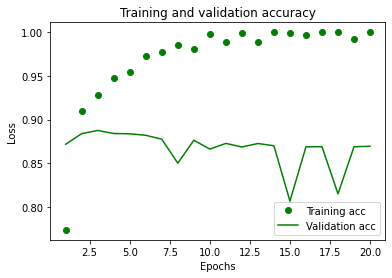

In [ ]:
plt.clf()   # clear figure
threely_acc_values = history_dict['accuracy']
threely_val_acc_values = history_dict['val_accuracy']

plt.plot(threely_epochs, threely_acc_values, 'go', label='Training acc')
plt.plot(threely_epochs, threely_val_acc_values, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_test = model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5374 - accuracy: 0.7300
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2400 - accuracy: 0.9106
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1863 - accuracy: 0.9305
Epoch 4/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1414 - accuracy: 0.9495


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3299 - accuracy: 0.8782


For 32 neurons, the number of epochs were 5 with a accuracy on the test set of 87.82% and a loss of 0.33

For 150 neurons, the number of epochs were 3 with a accuracy on the test set of 87.75% with a loss of 0.43

For 400 neurons, the number of epochs were 4 with a accuracy on the test set of 88% and loss of 0.47. It seems like increasing the number of neurons the model performance's tends to increase. Nevertheless, it requires more computational cost and it seems the model did not improved much compared to 150 neurons.

### **Test Visuals**

In [ ]:
history_test = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_test, y_test))

In [ ]:
history_dict = history_test.history
history_dict.keys()

threely_accuracy = history_test.history['accuracy']
threely_val_accuracy = history_test.history['val_accuracy']
threely_loss = history_test.history['loss']
threely_val_loss = history_test.history['val_loss']

threely_epochs = range(1, len(threely_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(threely_epochs, threely_loss, 'go', label='Training loss')
# b is for "solid blue line"
plt.plot(threely_epochs, threely_val_loss, 'g', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()   # clear figure
threely_acc_values = history_dict['accuracy']
threely_val_acc_values = history_dict['val_accuracy']

plt.plot(threely_epochs, threely_acc_values, 'go', label='Training acc')
plt.plot(threely_epochs, threely_val_acc_values, 'g', label='Test acc')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.predict(x_test)

##**Neural Network with MSE Loss Function**

Based on the previous section, we saw that running the model with three layer neural network and 16 neurons (units) the accuracy of the model was better. Now, we will play around with the MSE loss function, and see if this loss fuction type influences in the accuracy of the model.

In [ ]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(400, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 39ms/step - loss: 0.2262 - accuracy: 0.6603 - val_loss: 0.0993 - val_accuracy: 0.8638
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0704 - accuracy: 0.9104 - val_loss: 0.0809 - val_accuracy: 0.8886
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0437 - accuracy: 0.9428 - val_loss: 0.0848 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0233 - accuracy: 0.9722 - val_loss: 0.0918 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0042 - accuracy: 0.9957 - val_loss: 0.0909 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0114 - accuracy: 0.9878 - val_loss: 0.0936 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0018 - accuracy: 0.9979 - val_loss: 0.0955 - val_accuracy: 0.8830
Epoch 8/20
30

Utilizing the MSE loss function, three layers, and 16 neurons, the accuracy of the model on the validation set is 86.46% and validation loss of 0.1128

Utilizing the MSE loss function, three layers, and 400 neurons, the accuracy of the model on the validation set increased to 88.78% and a loss of 0.10

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

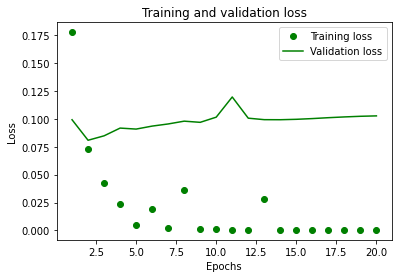

In [ ]:
import matplotlib.pyplot as plt

threely_accuracy = history.history['accuracy']
threely_val_accuracy = history.history['val_accuracy']
threely_loss = history.history['loss']
threely_val_loss = history.history['val_loss']

threely_epochs = range(1, len(threely_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(threely_epochs, threely_loss, 'go', label='Training loss')
# b is for "solid blue line"
plt.plot(threely_epochs, threely_val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

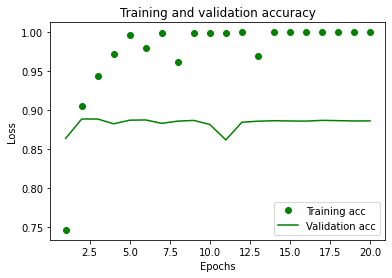

In [ ]:
plt.clf()   # clear figure
threely_acc_values = history_dict['accuracy']
threely_val_acc_values = history_dict['val_accuracy']

plt.plot(threely_epochs, threely_acc_values, 'go', label='Training acc')
plt.plot(threely_epochs, threely_val_acc_values, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(400, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2573 - accuracy: 0.6680
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.0751 - accuracy: 0.8972
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.0395 - accuracy: 0.9477
Epoch 4/4
49/49 [==============================] - 1s 14ms/step - loss: 0.0175 - accuracy: 0.9792


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.1062 - accuracy: 0.8671


Regarding the accuracy on the testing set, running 4 epochs, and 16 neurons the accuracy increased to 86.90% with a loss of 0.0452

Regarding the accuracy on the testing set, running 4 epochs, and 400 neurons the increased to 87.21% and a loss of 0.1062


In [ ]:
model.predict(x_test)

array([[0.07084939],
       [1.        ],
       [0.9999858 ],
       ...,
       [0.28784606],
       [0.08461204],
       [0.9499135 ]], dtype=float32)


###**Neural Network with TANH Activation** 

Here we will change the Sigmoid activation for Tanh activation.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
np.random.seed(123) 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5663 - accuracy: 0.7201 - val_loss: 0.3363 - val_accuracy: 0.8784
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2646 - accuracy: 0.9126 - val_loss: 0.2936 - val_accuracy: 0.8790
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1817 - accuracy: 0.9382 - val_loss: 0.2907 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1246 - accuracy: 0.9580 - val_loss: 0.3316 - val_accuracy: 0.8800
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1003 - accuracy: 0.9654 - val_loss: 0.3433 - val_accuracy: 0.8799
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0691 - accuracy: 0.9792 - val_loss: 0.3894 - val_accuracy: 0.8711
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0543 - accuracy: 0.9850 - val_loss: 0.4242 - val_accuracy: 0.8730
Epoch 8/20
30

Utilizing Tahn instead of relo and with 16 neurons, the accuracy is 85.67% and loss of 0.81

Utilizing Tahn instead of relo and with 400 neurons, the accuracy increased to 86.53% and a validation loss of 1.42

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

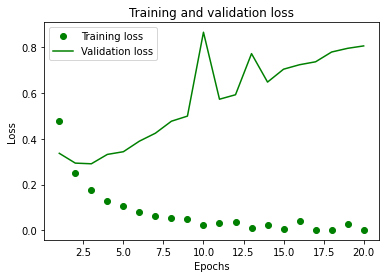

In [ ]:
import matplotlib.pyplot as plt

threely_accuracy = history.history['accuracy']
threely_val_accuracy = history.history['val_accuracy']
threely_loss = history.history['loss']
threely_val_loss = history.history['val_loss']

threely_epochs = range(1, len(threely_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(threely_epochs, threely_loss, 'go', label='Training loss')
# b is for "solid blue line"
plt.plot(threely_epochs, threely_val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

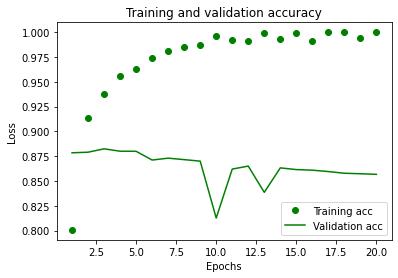

In [ ]:
plt.clf()   # clear figure
threely_acc_values = history_dict['accuracy']
threely_val_acc_values = history_dict['val_accuracy']

plt.plot(threely_epochs, threely_acc_values, 'go', label='Training acc')
plt.plot(threely_epochs, threely_val_acc_values, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5249 - accuracy: 0.7508
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2273 - accuracy: 0.9199
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1709 - accuracy: 0.9392
Epoch 4/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1371 - accuracy: 0.9539


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3423 - accuracy: 0.8712


Test set accuracy with 16 neurons and 4 epochs is 87.12% and loss of 0.34

Test set accuracy with 400 neurons and 4 epochs decreased to 86.19% and loss of 0.3498

In [ ]:
model.predict(x_test)

array([[0.03780467],
       [0.9946609 ],
       [0.9891088 ],
       ...,
       [0.15057546],
       [0.04490682],
       [0.82132167]], dtype=float32)

##**Feature Engineering Techniques: Regularization and Dropout** 

After running the model several times with different number of layers, neurons, activation fuction, and loss fuction. We saw that the model did not improved much. It had a range of test accucary between 86% to 89%, and the best model was running the IMDB example with three layers, 16 neurons, utilizing relu activation, and binary_crossentropy as loss fuction. Based on that, this section we will try out different feature engineering methods such as regularization and dropout.

**Regularization**

In [ ]:
from keras import regularizers
from keras import models
from keras import layers

reg_model = models.Sequential()
reg_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                           activation='relu', input_shape=(10000,)))
reg_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                           activation='relu'))
reg_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                           activation='relu'))
reg_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
reg_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
reg_model_hist = reg_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 44ms/step - loss: 0.6289 - acc: 0.7282 - val_loss: 0.3997 - val_acc: 0.8833
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3407 - acc: 0.9070 - val_loss: 0.3616 - val_acc: 0.8790
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2790 - acc: 0.9232 - val_loss: 0.3450 - val_acc: 0.8844
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2455 - acc: 0.9349 - val_loss: 0.3531 - val_acc: 0.8826
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2276 - acc: 0.9408 - val_loss: 0.3614 - val_acc: 0.8791
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2237 - acc: 0.9415 - val_loss: 0.3702 - val_acc: 0.8788
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2226 - acc: 0.9413 - val_loss: 0.4026 - val_acc: 0.8697
Epoch 8/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2076 - a

By implementing the regularization, the test accuaracy is 86.57% and the test loss is 0.49 

In [ ]:
epochs = range(1, 21)

reg_history_dict = reg_model_hist.history
reg_history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

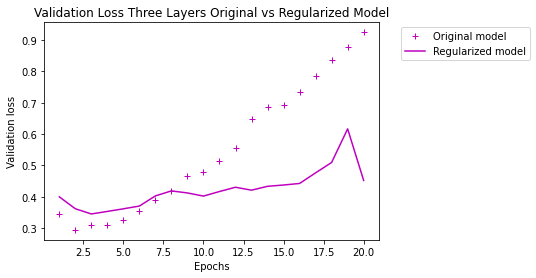

In [ ]:
import matplotlib.pyplot as plt

original_val_loss = original_hist.history['val_loss']
reg_model_val_loss = reg_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'm+', label='Original model')
plt.plot(epochs, reg_model_val_loss, 'm', label='Regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Validation Loss Three Layers Original vs Regularized Model')

plt.show()

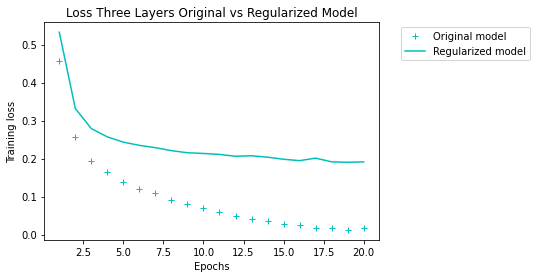

In [ ]:
original_loss = original_hist.history['loss']
reg_model_loss = reg_model_hist.history['loss']

plt.plot(epochs, original_loss, 'c+', label='Original model')
plt.plot(epochs, reg_model_loss, 'c', label='Regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Loss Three Layers Original vs Regularized Model')


plt.show()

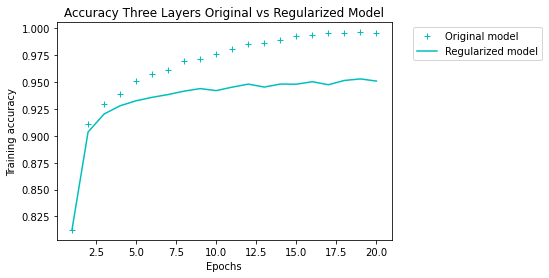

In [ ]:
original_accuracy = original_hist.history['accuracy']
reg_model_accuracy = reg_model_hist.history['acc']

plt.plot(epochs, original_accuracy, 'c+', label='Original model')
plt.plot(epochs, reg_model_accuracy, 'c', label='Regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Accuracy Three Layers Original vs Regularized Model')


plt.show()

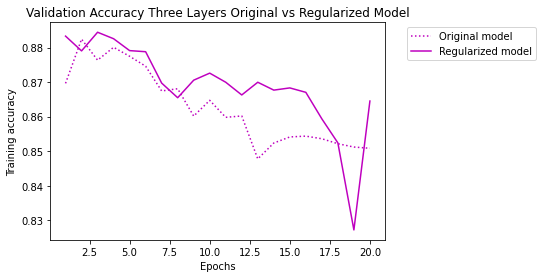

In [ ]:
original_val_accuracy = original_hist.history['val_accuracy']
reg_model_val_accuracy = reg_model_hist.history['val_acc']

plt.plot(epochs, original_val_accuracy, 'm:', label='Original model')
plt.plot(epochs, reg_model_val_accuracy, 'm', label='Regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Validation Accuracy Three Layers Original vs Regularized Model')


plt.show()

**Dropout**

In [ ]:
model.add(layers.Dropout(0.5))

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.6765 - acc: 0.5643 - val_loss: 0.6051 - val_acc: 0.8333
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.5871 - acc: 0.7719 - val_loss: 0.5076 - val_acc: 0.8584
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.5111 - acc: 0.8439 - val_loss: 0.4539 - val_acc: 0.8730
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4623 - acc: 0.8708 - val_loss: 0.4300 - val_acc: 0.8753
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4291 - acc: 0.8835 - val_loss: 0.4115 - val_acc: 0.8746
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3947 - acc: 0.8962 - val_loss: 0.3990 - val_acc: 0.8724
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3644 - acc: 0.8972 - val_loss: 0.3996 - val_acc: 0.8702
Epoch 8/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3461 - a

By implementing the dropout technique, the test accuaracy is 84.85% and the test loss is 0.66 

In [ ]:
epochs = range(1, 21)

dpt_history_dict = dpt_model_hist.history
dpt_history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

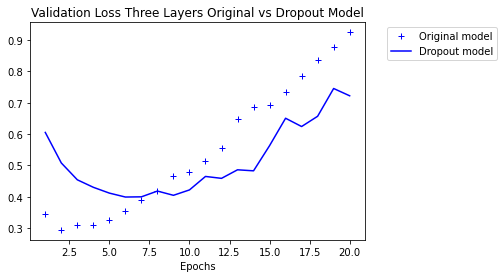

In [ ]:
import matplotlib.pyplot as plt

original_val_loss = original_hist.history['val_loss']
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'b', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Validation Loss Three Layers Original vs Dropout Model')


plt.show()

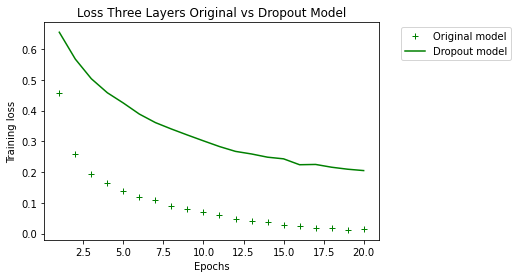

In [ ]:
original_loss = original_hist.history['loss']
dpt_model_loss = dpt_model_hist.history['loss']

plt.plot(epochs, original_loss, 'g+', label='Original model')
plt.plot(epochs, dpt_model_loss, 'g', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Loss Three Layers Original vs Dropout Model')


plt.show()

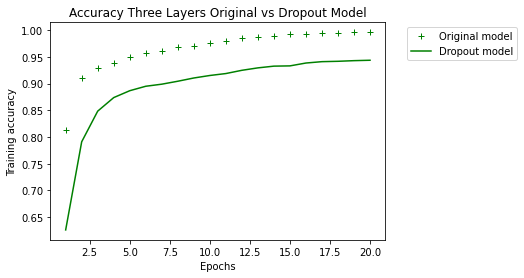

In [ ]:
original_accuracy = original_hist.history['accuracy']
dpt_model_accuracy = dpt_model_hist.history['acc']

plt.plot(epochs, original_accuracy, 'g+', label='Original model')
plt.plot(epochs, dpt_model_accuracy, 'g', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Accuracy Three Layers Original vs Dropout Model')


plt.show()

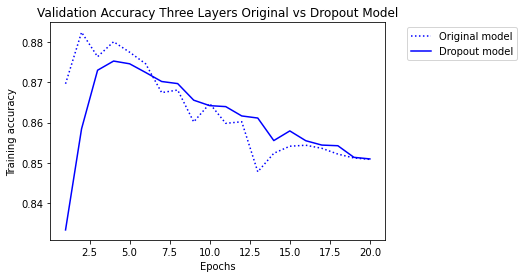

In [ ]:
original_val_accuracy = original_hist.history['val_accuracy']
dpt_model_val_accuracy = dpt_model_hist.history['val_acc']

plt.plot(epochs, original_val_accuracy, 'b:', label='Original model')
plt.plot(epochs, dpt_model_val_accuracy, 'b', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Validation Accuracy Three Layers Original vs Dropout Model')


plt.show()

###**EXTRA CODE FOR VISUALS**

Code to retrieved the variables from the original Three Layer NN

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


original_hist = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 32ms/step - loss: 0.5536 - accuracy: 0.7302 - val_loss: 0.3447 - val_accuracy: 0.8696
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2699 - accuracy: 0.9096 - val_loss: 0.2941 - val_accuracy: 0.8824
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1911 - accuracy: 0.9331 - val_loss: 0.3093 - val_accuracy: 0.8764
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1609 - accuracy: 0.9427 - val_loss: 0.3110 - val_accuracy: 0.8801
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1330 - accuracy: 0.9538 - val_loss: 0.3263 - val_accuracy: 0.8775
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1108 - accuracy: 0.9626 - val_loss: 0.3550 - val_accuracy: 0.8746
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0989 - accuracy: 0.9667 - val_loss: 0.3891 - val_accuracy: 0.8674
Epoch 8/20
49

Summary table code

In [ ]:
import pandas as pd

data = {'Test Type': ['NN 2 Layers Relu Activation 16 Neurons','NN 1 Layer Relu Activation 16 Neurons',
                      'NN 3 Layers Relu Activation 16 Neurons','NN 3 Layers Relu Activation 32 Neurons',
                      'NN 3 Layers Relu Activation 150 Neurons','NN 3 Layers Relu Activation 400 Neurons',
                      'NN 3 Layers MSE Loss Function 16 Neurons', 'NN 3 Layers MSE Loss Function 400 Neurons',
                      'NN 3 Layers Tanh Activation 16 Neurons', 'NN 3 Layers Tanh Activation 400 Neurons',
                      'NN 3 Layers Regularization 16 Neurons','NN 3 Layers Dropout 16 Neurons'],
        'Loss Validation': [0.72,0.48,0.74,0.93, 1.74, 1.40, 0.11, 0.10, 0.81, 1.42, '-', '-'],
        'Accuracy Validation': ['86.25%','87.14%','86.56%','86.77%','88.15%', '88.87%', '86.46%', '88.78%', '85.67%', '86.53%', '-', '-'],
        'Loss Test': [0.32,0.29,0.29,0.33,0.43, 0.47, 0.05, 0.11, 0.43, 0.35, 0.49, 0.66],
        'Accuracy Test': ['87.64%', '87.97%', '88.84%', '87.82%', '87.75%', '88%', '86.90%', '87.21%', '87.12%', '86.19%', '86.57%', '85.08%'],
        'Number of Final Epochs': [4,5,2,5,3,4,4,4,4, 4, 20, 20]
        }

df = pd.DataFrame(data, columns = ['Test Type', 'Loss Validation', 'Accuracy Validation', 'Loss Test', 'Accuracy Test', 'Number of Final Epochs'])

df

,Test Type,Loss Validation,Accuracy Validation,Loss Test,Accuracy Test,Number of Final Epochs
0,NN 2 Layers Relu Activation 16 Neurons,0.72,86.25%,0.32,87.64%,4
1,NN 1 Layer Relu Activation 16 Neurons,0.48,87.14%,0.29,87.97%,5
2,NN 3 Layers Relu Activation 16 Neurons,0.74,86.56%,0.29,88.84%,2
3,NN 3 Layers Relu Activation 32 Neurons,0.93,86.77%,0.33,87.82%,5
4,NN 3 Layers Relu Activation 150 Neurons,1.74,88.15%,0.43,87.75%,3
5,NN 3 Layers Relu Activation 400 Neurons,1.4,88.87%,0.47,88%,4
6,NN 3 Layers MSE Loss Function 16 Neurons,0.11,86.46%,0.05,86.90%,4
7,NN 3 Layers MSE Loss Function 400 Neurons,0.1,88.78%,0.11,87.21%,4
8,NN 3 Layers Tanh Activation 16 Neurons,0.81,85.67%,0.43,87.12%,4
9,NN 3 Layers Tanh Activation 400 Neurons,1.42,86.53%,0.35,86.19%,4


Visuals code

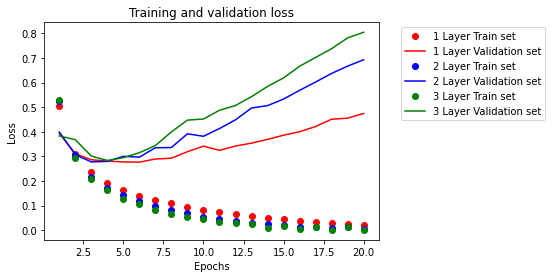

In [ ]:
# Training and Validation Loss Summary

plt.plot(onely_epochs, onely_loss, 'ro', label='1 Layer Train set')
plt.plot(onely_epochs, onely_val_loss, 'r', label='1 Layer Validation set')
plt.plot(twoly_epochs, twoly_loss, 'bo', label='2 Layer Train set')
plt.plot(twoly_epochs, twoly_val_loss, 'b', label='2 Layer Validation set')
plt.plot(threely_epochs, threely_loss, 'go', label='3 Layer Train set')
plt.plot(threely_epochs, threely_val_loss, 'g', label='3 Layer Validation set')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

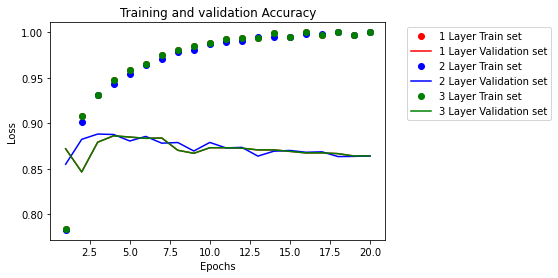

In [ ]:
# Training and Validation Accuracy Summary

plt.plot(onely_epochs, onely_acc_values, 'ro', label='1 Layer Train set')
plt.plot(onely_epochs, onely_val_acc_values, 'r', label='1 Layer Validation set')
plt.plot(twoly_epochs, twoly_binary_accuracy, 'bo', label='2 Layer Train set')
plt.plot(twoly_epochs, twoly_val_binary_accuracy, 'b', label='2 Layer Validation set')
plt.plot(threely_epochs, threely_acc_values, 'go', label='3 Layer Train set')
plt.plot(threely_epochs, threely_val_acc_values, 'g', label='3 Layer Validation set')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

##**Summary**

This section is about the summary of all techniques implemented to the model. At the end of this section, we will see a table summary showing the losses and accuracies of the models by changing the activation function, loss function, number of neurons, layers, and feature enginiring techniques to find the best model. 

**Different Layers**

The following two charts show a direct comparison of the loss and accuracy between the training set and validation set by trying a different number of layers. The book's example was a model of two layers, utilizing 16 neurons, relu as activation function, and binary cross-entropy loss function. I modified the model by using only one layer and three layers to see which model performed better and let's see the differences between these models.

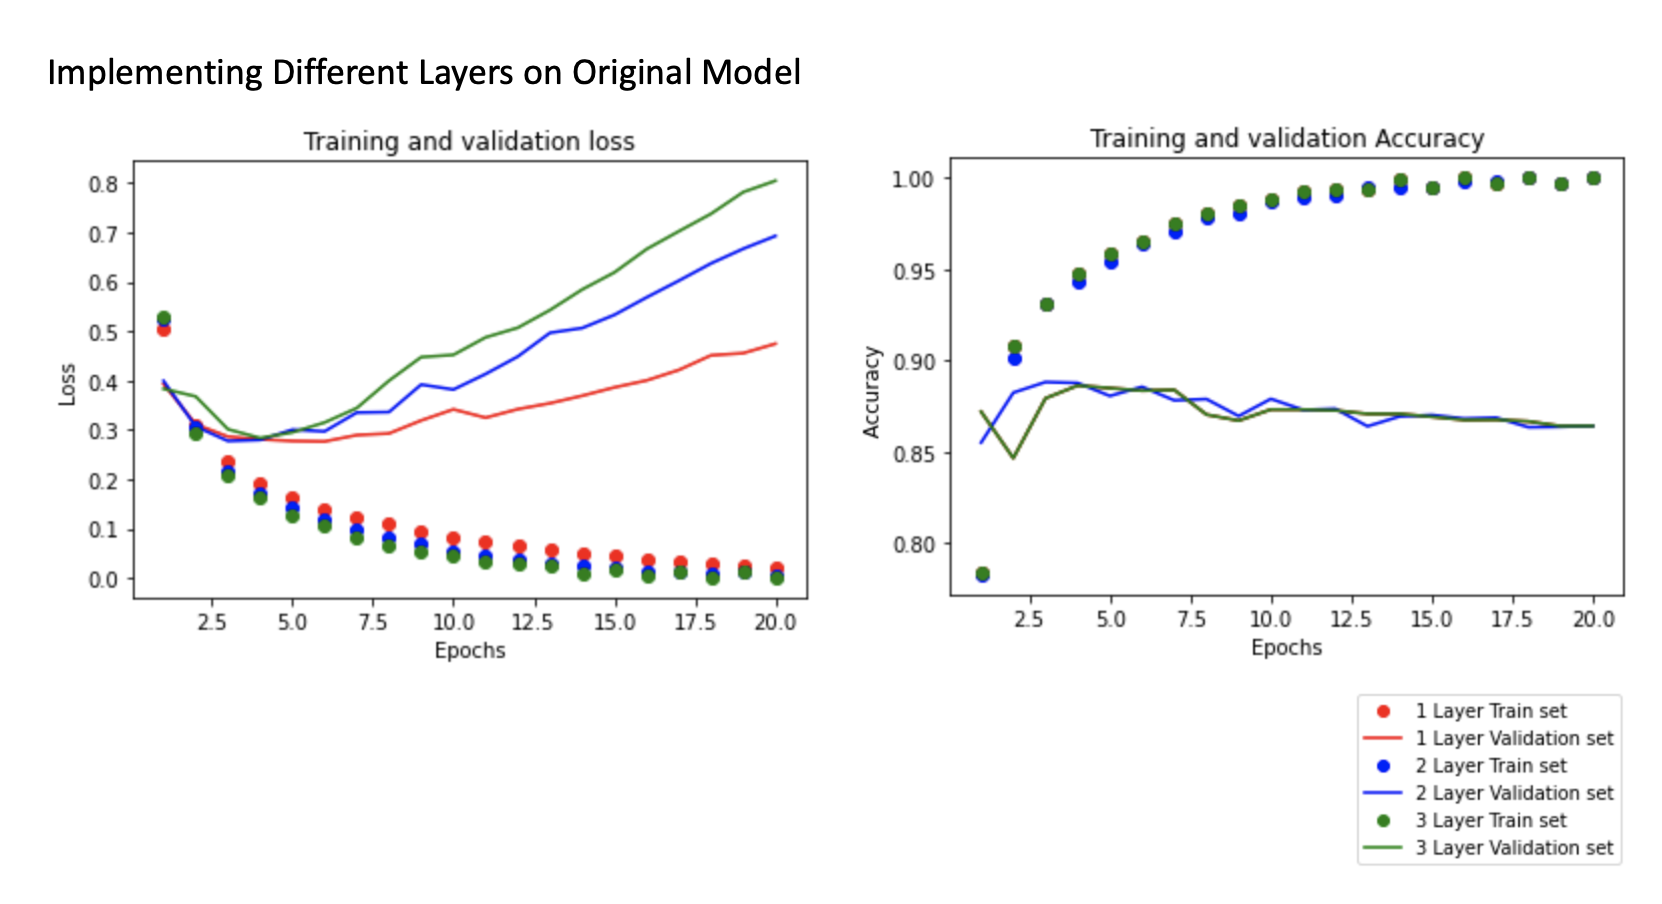

As we learned in the class, the smaller the loss function is better because it is closer to the target. The bigger the loss function, the far away from the target it is. So, here we can see that the loss function in the validation set is getting bigger and bigger, which is not a good sign for the model. Additionally, we can see that after the fourth or fifth epoch, the loss tends to increase. Due to this, we utilized 4 epochs when running the model for the testing set.

Regarding the validation, layer one and layer two have the same behave - for that reason the red line and dots are not showing up in the visual, and there is no much difference between two layers to three layers. For this reason, we will directly compare the validation and test accuracy in the following visual.

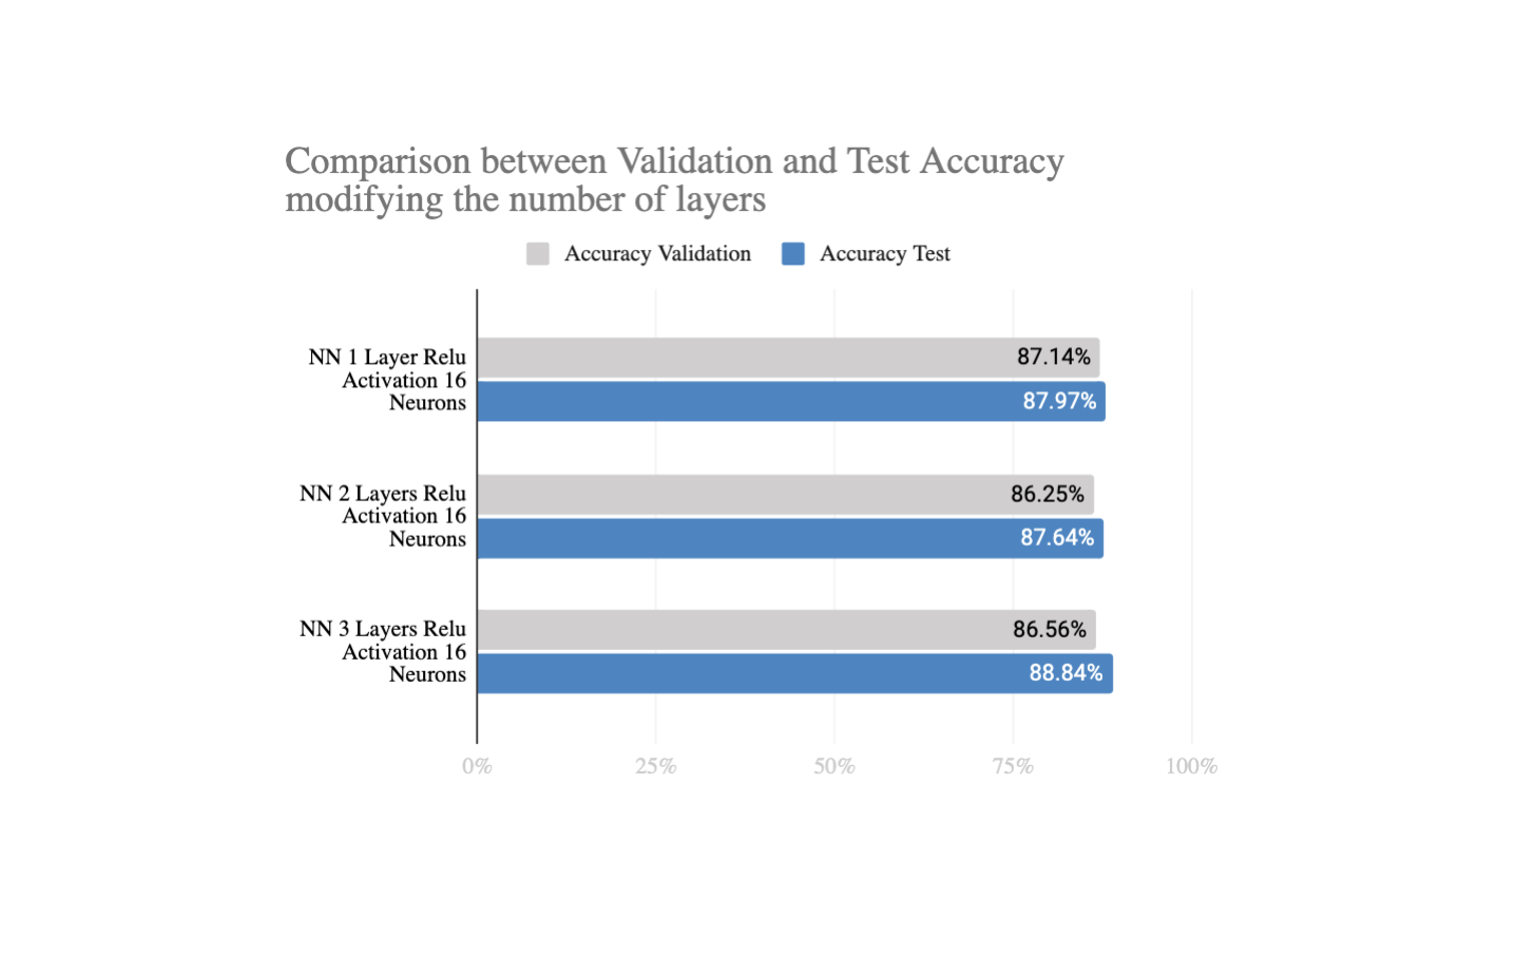

By changing the number of layers, the accuracy of the model does not improve much. The model using three layers, however, shows a better accuracy compared to the other two. For this reason, in the following sections, we used this model as a baseline and called it the "Original Model."

**Feature Engineering** 

Feature engineering is the process of applying techniques such as regularization - Lasso or Ridge, dropout, early stopping, etc. to improve the performance of machine learning algorithms. 

+ Regularization is the process of modulating the quantity of information a model is allowed to store or add. The most famous regularizers are Lasso (L2) and Ridge (L1).

+ Dropout is a regularization technique that drops or ignores neurons randomly. This technique is good for very complex models.

In the following four visuals, we will compare the **regularized** model with the original model and see how the loss and accuracy of the training and validation set behaves. To regularize our model, we used the LASSO regularizer (L2) - also called weight decay, to enhance the performance. 





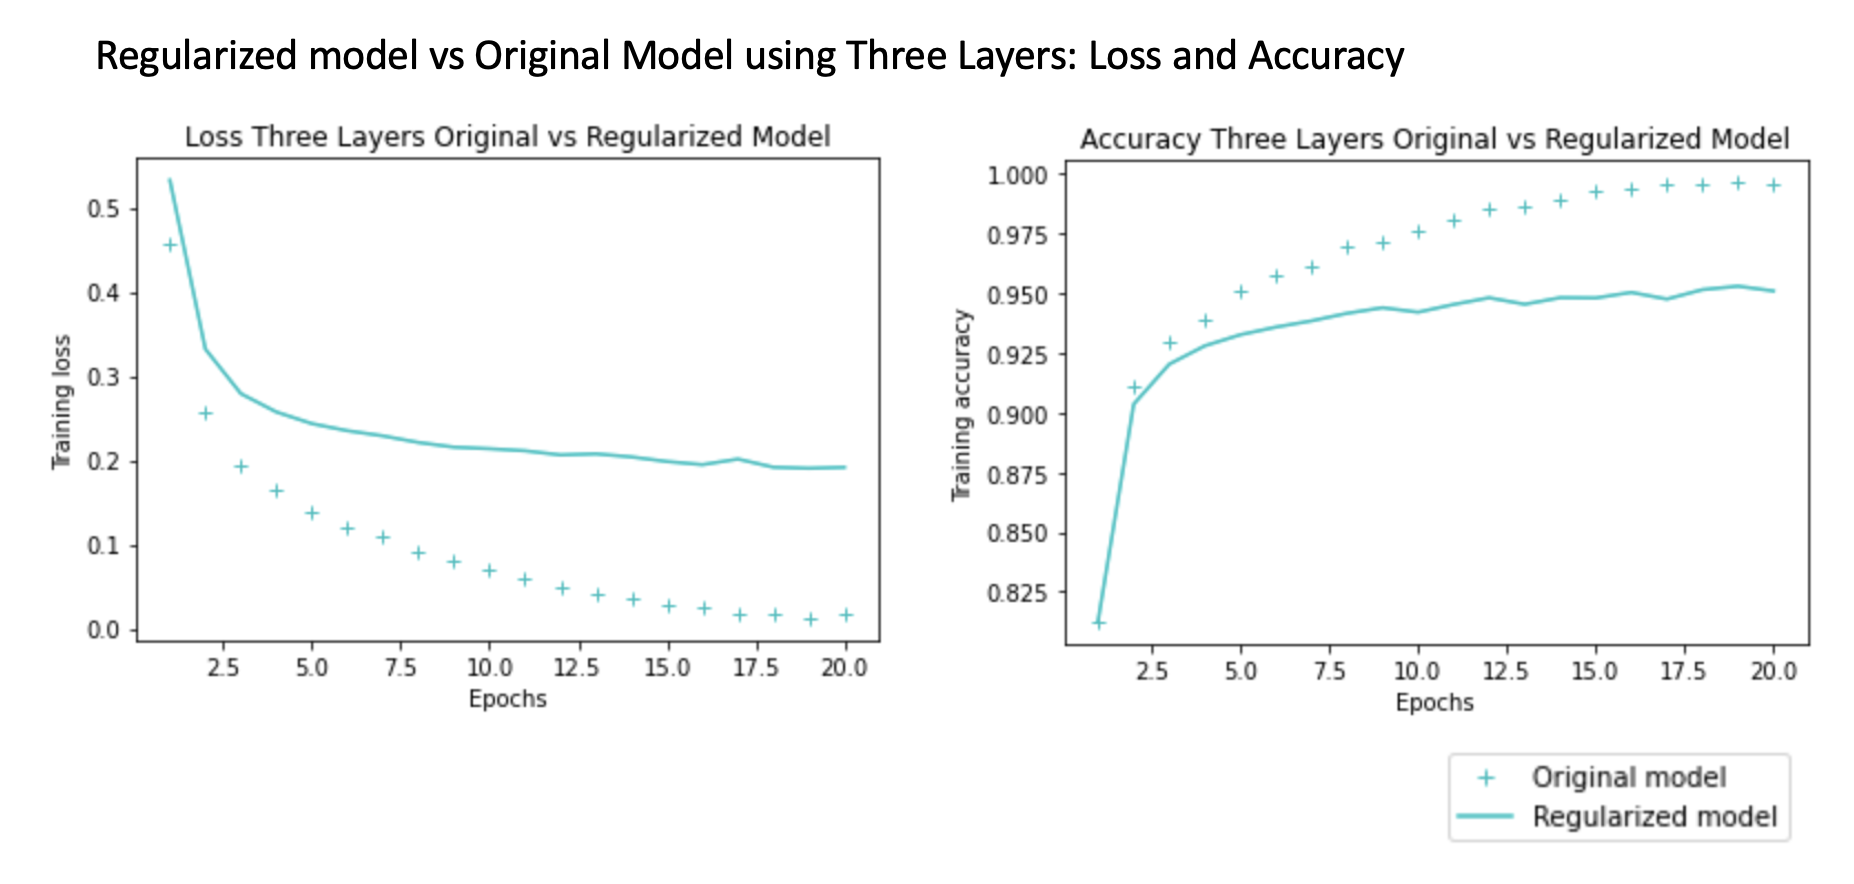

Remember that smaller loss is better! In this case, we can determine that the regularized model is perfoming worse compared to the original model. Similar effect we can see in the accuracy graph. 

Now, let's see the loss and accuracy on the validation set.


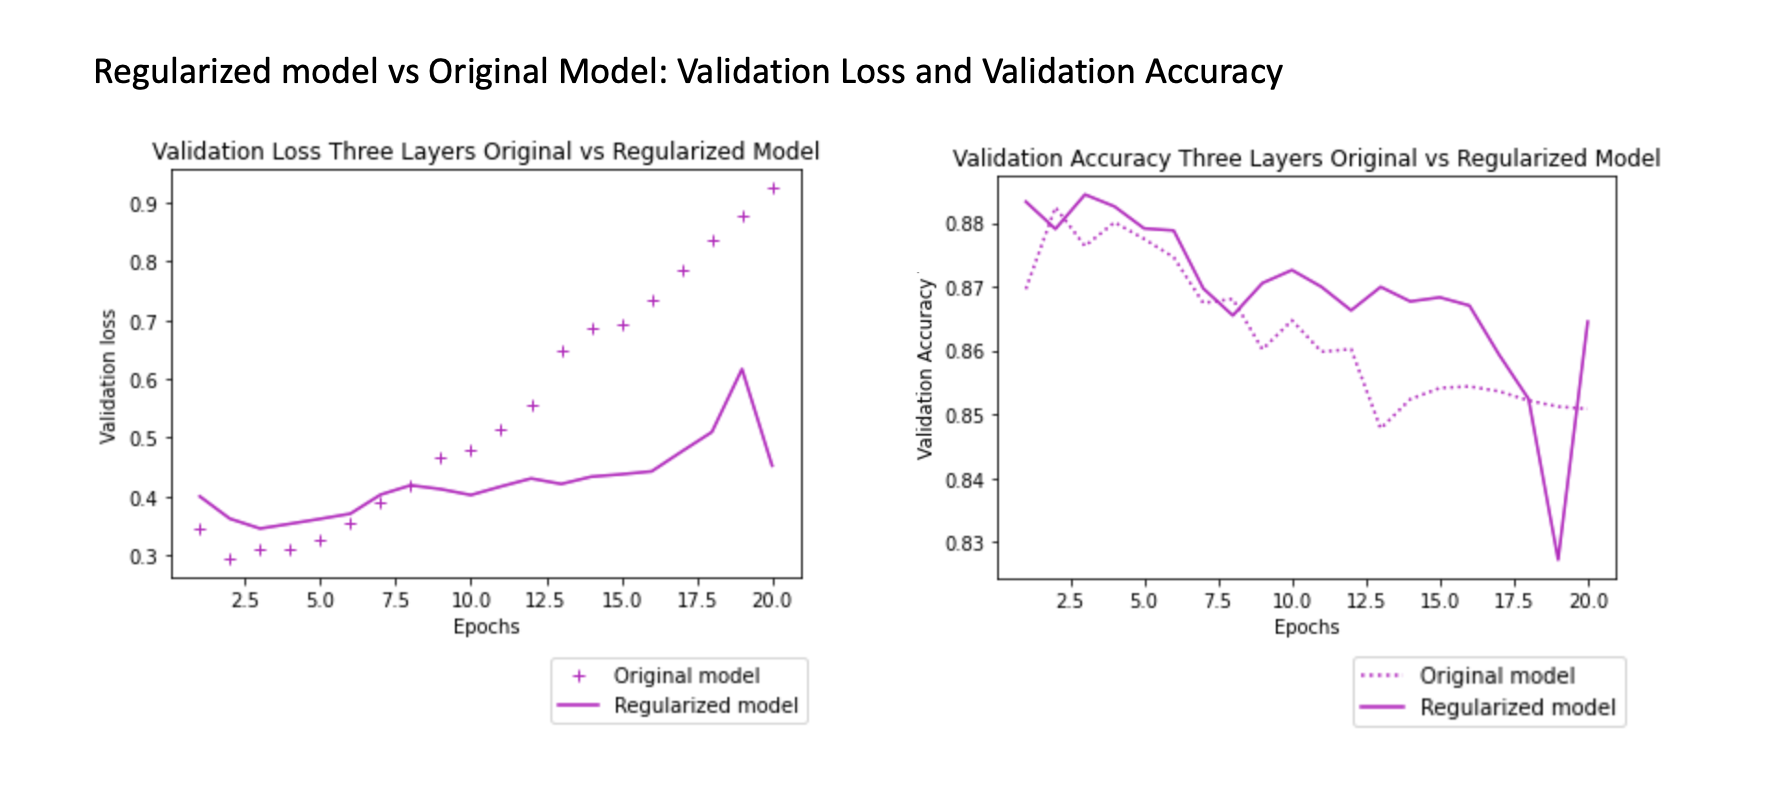

The validation loss and accuracy behave very weirdly. We can see that the model goes up and down drastically. It confirms that adding the regularized Lasso technique is not necessary. For instance, in the loss, we can see that after the third or fourth epoch, the model original had better performance than a regularized model. Regarding the validation, the regularized model started with better performance, but after the sixth or seventh epoch, the accuracy went down.


Now, we are going to see the loss and accuracy for the training and validation set utilizing the **dropout** technique.

As mentioned earlier, the dropout technique randomly reduces the number of neurons, and it helps to reduce overfitting and have better performance. 

The following graphs show the loss and accuracy in the training set comparing the dropout model and the original model. Here we can see that in both cases, the original model performs better.

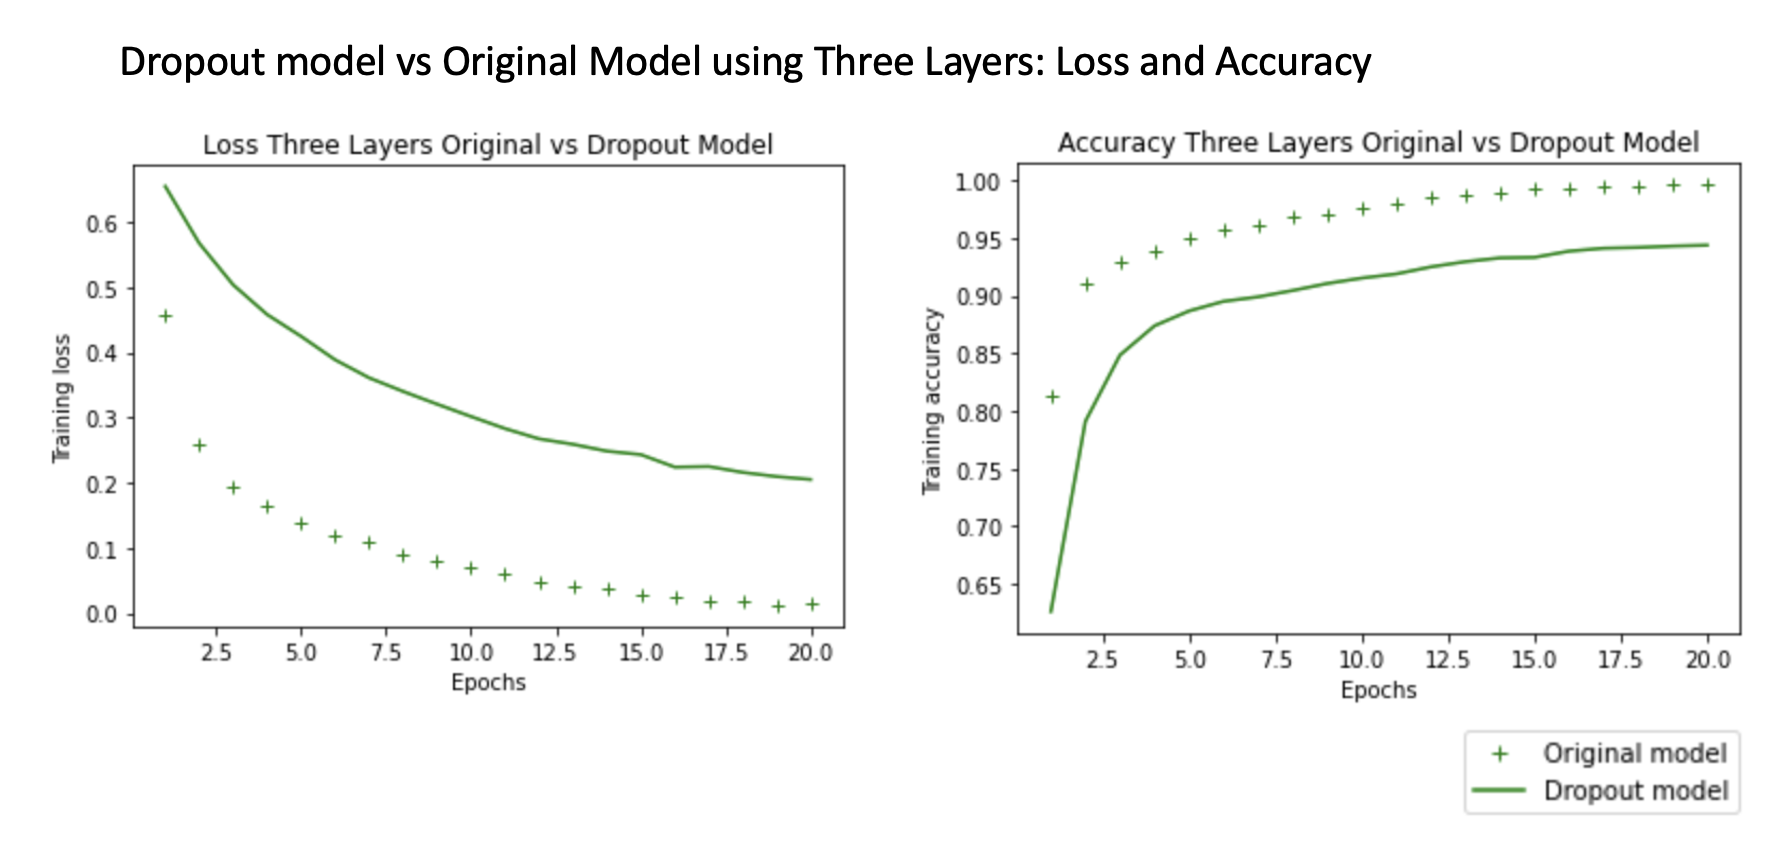

Let's now see the loss and accuracy on the validation set.

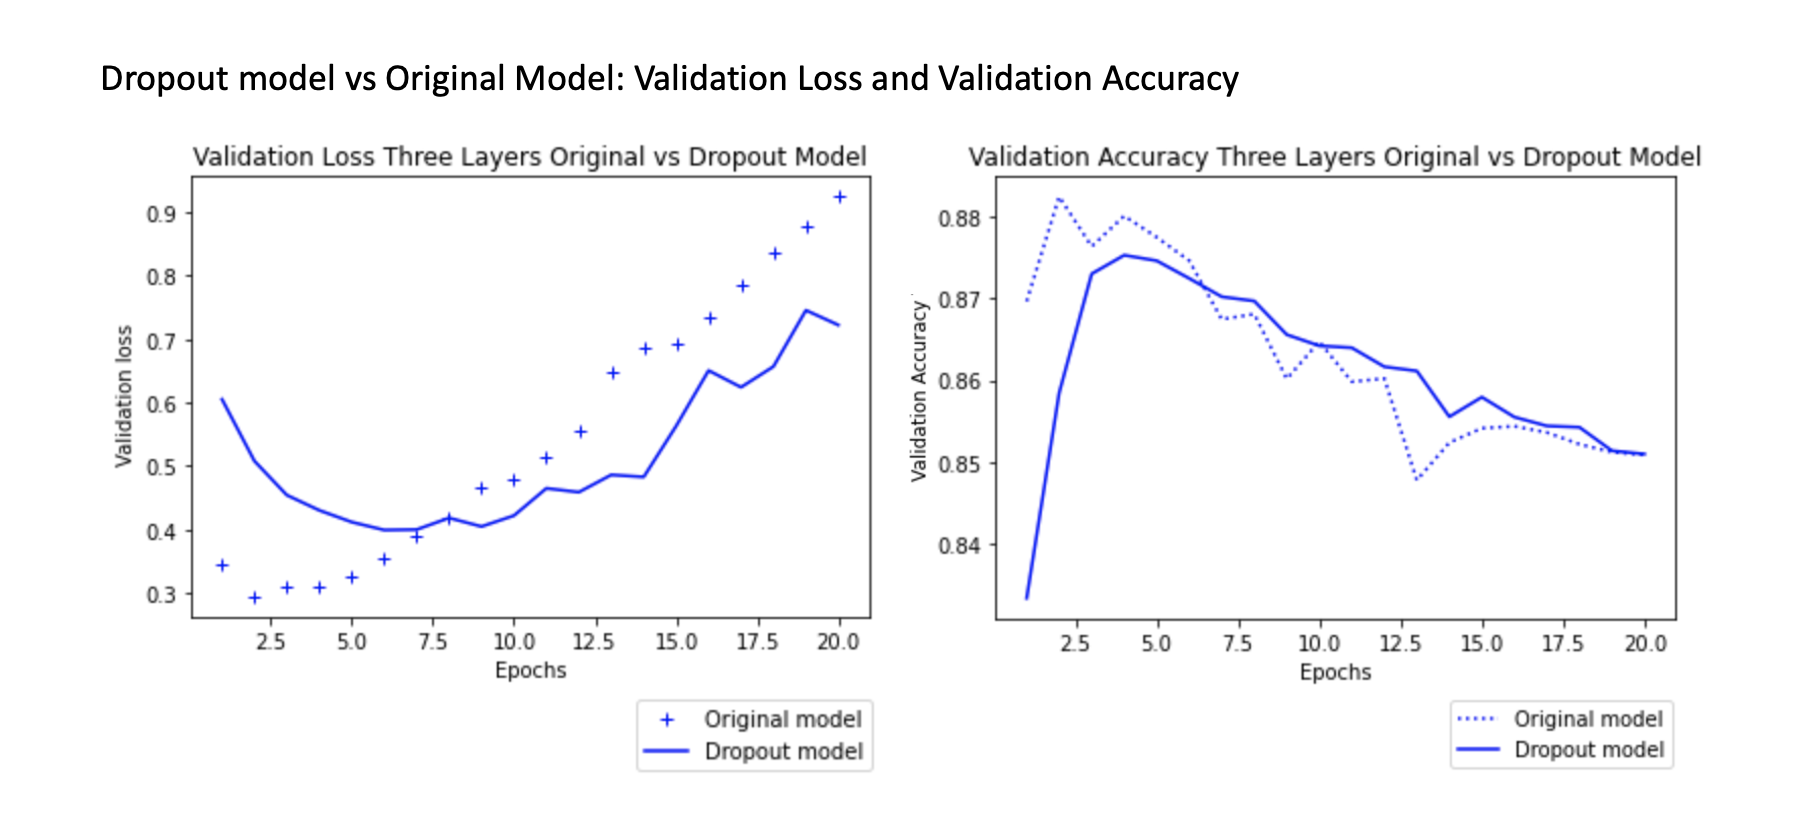

We can see that regularization and dropout techniques have a similar trend. It makes sense because both techniques - L2 and Dropout, try to deactivate neurons or select some neurons in the training by adding a penalty. However, Dropout does it randomly. 

Based on the loss and the accuracy, the original model does a fair job on the fourth to fifth epoch. After that, the performance decreases. 

Now, the main question is: **Why the model with regularized and dropout technique performed worst compared to the original?** That could be for several reasons:

+ There is not enough data to feed the model.

+ The model we are utilizing seems to be so naive that by adding powerful techniques it performs worse. So, by adding the complexity of the model we could see better results.  

**Summary Table**

The following is a summary table comparing all different techniques applied to the model in order to find the higher accuracy. It shows all techniques and changes applied to the model like adding hidden units (neurons) of 32, 150, and 400 to see how the model behaved.

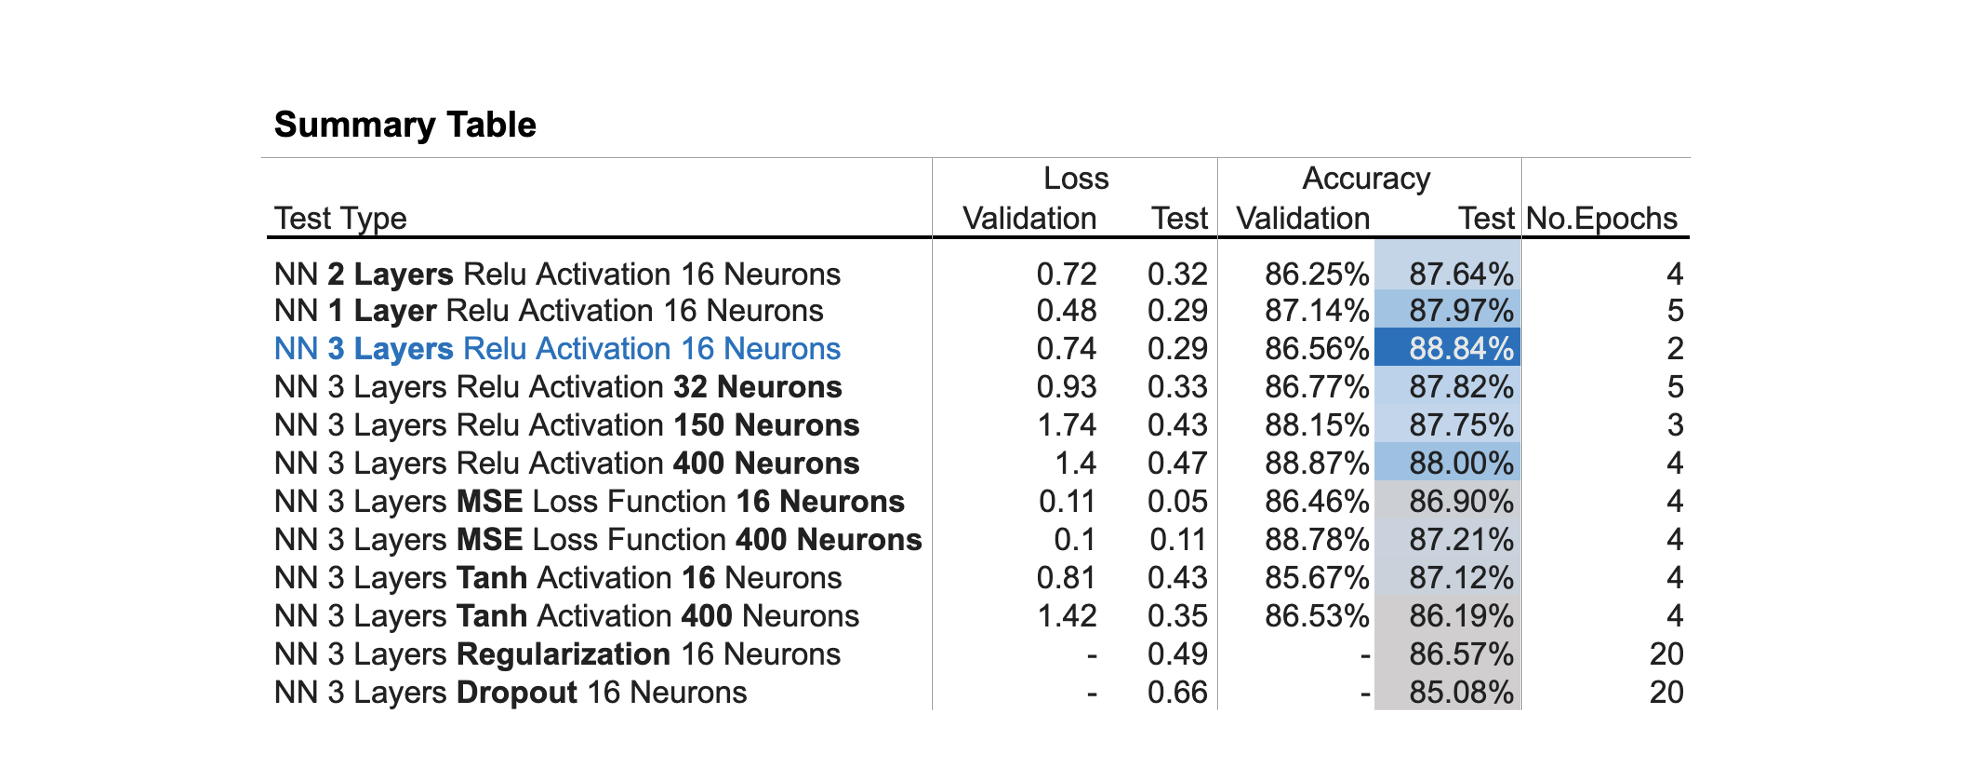

Based on the accuracy-test we determine the best model is the one with three layers, 16 neurons, using Relu activation function and binary cross-entropy loss function, showing an accuracy of almost 89%.

Adding other changes in the model like increasing the number of neurons, or changing the activation function did not make our model better. Something similar happens with changing the loss function to MSE. 

In conclusion, it seems that our model is too naive to use techniques such as regularization and dropout. As we confirmed on the summary table and graphs, when applying these techniques the model tends to get worse due to its simplicity or because the dataset is not enough to train the model well. To get higher accuracy, we should get state-of-the-art architecture.